In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [87]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [88]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)#deleting unneccessary features/columns 


In [89]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [90]:
#converting categorical columns into numerical columns like gender and geography
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [91]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [92]:
from sklearn.preprocessing import OneHotEncoder
oneHot_encoder = OneHotEncoder()
geo_encoder = oneHot_encoder.fit_transform(data[['Geography']]).toarray()

In [93]:
data = data.drop(['Geography'],axis=1)


In [94]:
geo_df = pd.DataFrame(geo_encoder,columns=oneHot_encoder.get_feature_names_out(['Geography']))

In [95]:
data = pd.concat([data,geo_df],axis=1)
data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0


In [96]:
#Dividing the data into train and test sets
X = data.drop(['Exited'],axis=1)
y = data['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#feature scaling using standard scaler, means converting large numeriacal values into mean,std values for faster convergence or training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]], shape=(8000, 12))

In [97]:
#Scalling means deriving the rules for the training data so that the same rules can be applied to the test data or new data. no need to train again


### ANN Implemention


In [98]:
#Saving the weights or rules of scalling and other preprocessing for future use
import pickle

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('Label_Encoder.pkl','wb') as file:
    pickle.dump(label_encoder,file)

with open('OneHot_Encoder.pkl','wb') as file:
    pickle.dump(oneHot_encoder,file)      

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime



In [100]:
#Dense(units=128,activation='relu',input_shape=(X_train.shape[1],))
#here units means number of neurons in that layer
# input_shape means number of features in the input data provided as tuple to the model 
# input_shape=(X_train.shape[1],) means number of columns/features in X_train data
#input shape should be provided only in the first layer of the model as to connect it to the input layer and rest of the layers will automatically connect to the previous layer
#becauese each layer takes input from the previous layer and this the meaning of sequential model

In [ ]:
### ANN Implemention
model = Sequential([
    Dense(units=128,activation='relu',input_shape=(X_train.shape[1],)),#first hidden layer with 128 neurons and relu activation function
    Dense(units=64,activation='relu'),#second hidden layer with 64 neurons and relu activation function
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='sigmoid')#output layer with sigmoid activation for binary classification

])

d:\ANN project\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
#model summary and compile
model.summary(
    
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
#model compile
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [104]:
#Creating Log directory for tensorboard
Log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=Log_dir,histogram_freq=1)


In [105]:
#Applying early stopping to avoid overfitting
early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',#monitoring validation loss to decide when to stop training
    patience = 7,#number of epochs to wait before stopping after no improvement
    restore_best_weights = True #Save the model weights from the epoch with the best value of the monitored quantity
)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


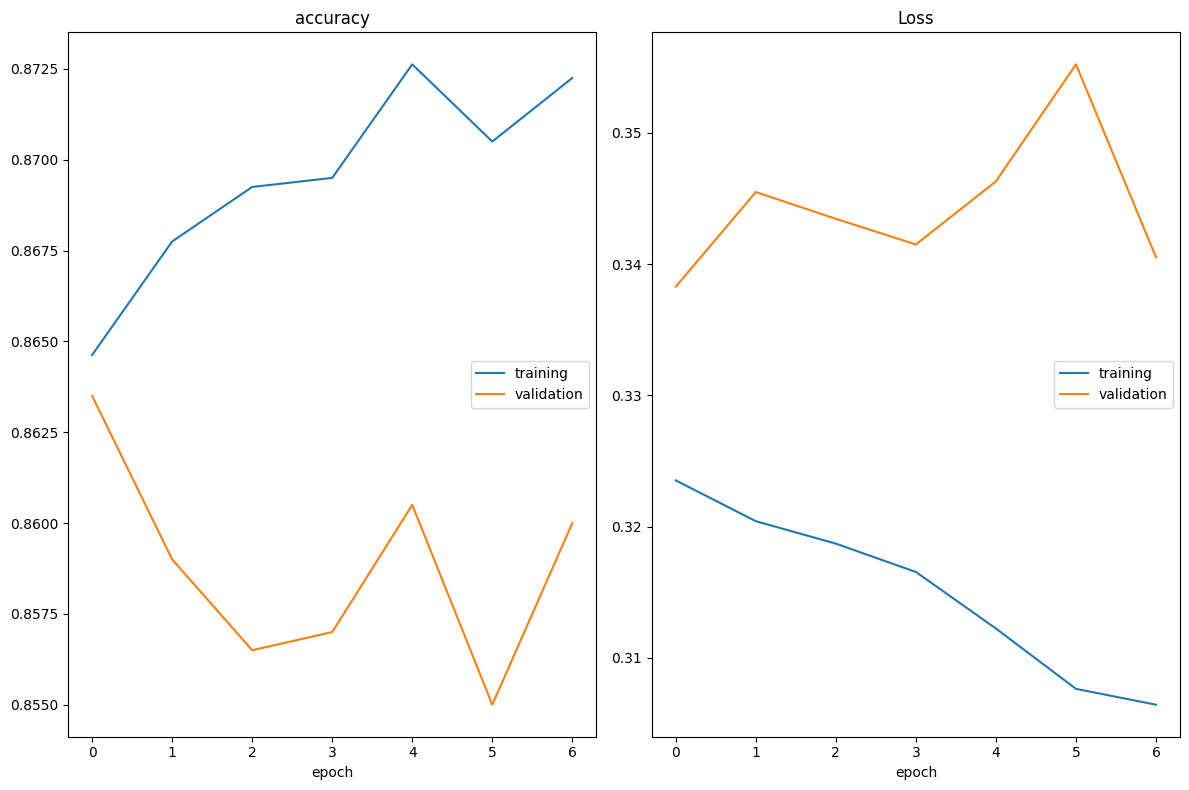

accuracy
	training         	 (min:    0.865, max:    0.873, cur:    0.872)
	validation       	 (min:    0.855, max:    0.863, cur:    0.860)
Loss
	training         	 (min:    0.306, max:    0.324, cur:    0.306)
	validation       	 (min:    0.338, max:    0.355, cur:    0.341)
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3064 - val_accuracy: 0.8600 - val_loss: 0.3405


In [111]:
#model fitting
from livelossplot import PlotLossesKeras
Churn = model.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    epochs = 100,
    callbacks=[tensorboard_callback,early_stopping_callback,PlotLossesKeras()]

)

In [108]:
%load_ext tensorboard

In [110]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6006 (pid 1700), started 0:00:36 ago. (Use '!kill 1700' to kill it.)

In [112]:
#saving the model
model.save('Churn_ANN_model.h5')